In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import pickle
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import os
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from skimage import data, color, feature
from itertools import chain
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [3]:
CNN_model = load_model('/content/drive/MyDrive/Machine Learning Assignment/Demo Hand-in/CNN98_model.h5')
SVC_model = pickle.load(open('/content/drive/MyDrive/Machine Learning Assignment/Demo Hand-in/SVC90_model.pickle', 'rb'))
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

In [4]:
def pre_process_CNN():
  base_path = '/content/drive/MyDrive/Machine Learning Assignment/Dataset/'
  types = ['Training', 'Testing']
  x_train = []
  x_test = []
  y_train = []
  y_test = []

  for type_ in types:
    for i, catagory in enumerate(categories):
      partial_path = os.path.join(base_path, type_, catagory)
      images = os.listdir(partial_path)
      for img in images:
        full_path = os.path.join(partial_path, img)
        if type_ == types[0]:
          x_train.append(load_img(full_path, color_mode='grayscale', target_size=(64, 64)))
          y_train.append(i)
        elif type_ == types[1]:
          x_test.append(load_img(full_path, color_mode='grayscale', target_size=(64, 64)))
          y_test.append(i)

  y_train = np.array(y_train)
  y_test = np.array(y_test)
  x_train = np.array(list(map(img_to_array, x_train)))/255.0
  x_test = np.array(list(map(img_to_array, x_test)))/255.0
  x_train = np.reshape(x_train, (len(x_train), 64, 64, 1))
  x_test = np.reshape(x_test, (len(x_test), 64, 64, 1))
  return x_train, x_test, y_train, y_test

x_train_CNN, x_test_CNN, y_train_CNN, y_test_CNN = pre_process_CNN()

In [ ]:
x_test_CNN[0]

array([[[0.00392157],
        [0.00392157],
        [0.00392157],
        ...,
        [0.00392157],
        [0.00392157],
        [0.00392157]],

       [[0.02352941],
        [0.02745098],
        [0.02745098],
        ...,
        [0.03529412],
        [0.02352941],
        [0.02745098]],

       [[0.02745098],
        [0.03137255],
        [0.03137255],
        ...,
        [0.02352941],
        [0.02352941],
        [0.01960784]],

       ...,

       [[0.02745098],
        [0.03137255],
        [0.02745098],
        ...,
        [0.02352941],
        [0.03137255],
        [0.02745098]],

       [[0.01960784],
        [0.02352941],
        [0.02745098],
        ...,
        [0.02745098],
        [0.02745098],
        [0.02352941]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]], dtype=float32)

In [ ]:
CNN_y_pred = np.argmax(CNN_model.predict(x_test_CNN), axis=1)
CNN_c_matrix = confusion_matrix(y_test_CNN, CNN_y_pred, normalize='true')

CNN_score = CNN_model.evaluate(x_test_CNN, y_test_CNN)
print(CNN_score[1])

41/41 [==============================] - 56s 1s/step - loss: 0.0911 - accuracy: 0.9741
0.9740656018257141


In [5]:
def pre_process_SVC():
  base_path = '/content/drive/MyDrive/Machine Learning Assignment/Dataset/'
  types = ['Training', 'Testing']
  x_train = []
  x_test = []
  y_train = []
  y_test = []

  for type_ in types:
    for i, catagory in enumerate(categories):
      partial_path = os.path.join(base_path, type_, catagory)
      images = os.listdir(partial_path)
      for img in images:
        full_path = os.path.join(partial_path, img)
        if type_ == types[0]:
          x_train.append(img_to_array(load_img(full_path, color_mode='grayscale', target_size=(64, 64))))
          y_train.append(i)
        elif type_ == types[1]:
          x_test.append(img_to_array(load_img(full_path, color_mode='grayscale', target_size=(64, 64))))
          y_test.append(i)

  x_train = np.array([feature.hog(img) for img in chain(x_train)])
  x_test = np.array([feature.hog(img) for img in chain(x_test)])

  y_train = np.array(y_train)
  y_test = np.array(y_test)

  return x_train, x_test, y_train, y_test

x_train_SVC, x_test_SVC, y_train_SVC, y_test_SVC = pre_process_SVC()

In [ ]:
SVC_score = cross_val_score(SVC_model, x_test_SVC, y_test_SVC, cv=10, scoring='accuracy')
print(SVC_score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (SVC_score.mean(), SVC_score.std()))

SVC_y_pred = SVC_model.predict(x_test_SVC)
SVC_c_matrix = confusion_matrix(y_test_SVC, SVC_y_pred, normalize='true')

[0.77272727 0.79389313 0.81679389 0.76335878 0.81679389 0.80152672
 0.86259542 0.78625954 0.81679389 0.80152672]
0.80 accuracy with a standard deviation of 0.03


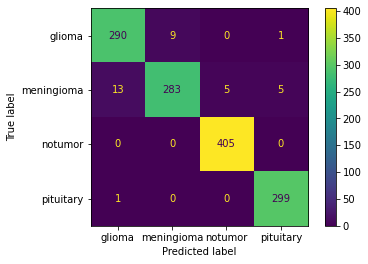

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_CNN, CNN_y_pred, display_labels=categories)

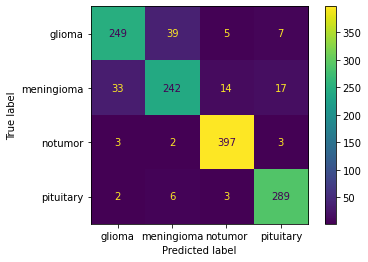

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_SVC, SVC_y_pred, display_labels=categories)

In [ ]:
CNN_score = CNN_model.evaluate(x_test_CNN, y_test_CNN)
print(CNN_score)

17/17 [==============================] - 25s 1s/step - loss: 0.1094 - accuracy: 0.9733
[0.10939667373895645, 0.9733333587646484]


In [ ]:
SVC_score = SVC_model.score(x_test_SVC, y_test_SVC)
print(SVC_score)

0.8977879481311976


In [14]:
from sklearn.metrics import f1_score

y_pred_CNN = CNN_model.predict(x_test_CNN)
y_pred_CNN = np.argmax(y_pred_CNN, axis=1)
print(y_pred_CNN.shape)
print(y_test_CNN.shape)
f1 = f1_score(y_test_CNN, y_pred_CNN, average=None)
print(f1)

(1311,)
(1311,)
[0.9602649  0.94648829 0.99386503 0.98842975]


In [17]:
for i, category in enumerate(categories):
  print('{} - f1 score = {}'.format(category, f1[i]))

glioma - f1 score = 0.9602649006622516
meningioma - f1 score = 0.9464882943143812
notumor - f1 score = 0.9938650306748467
pituitary - f1 score = 0.9884297520661156


In [20]:
from sklearn.metrics import f1_score

y_pred_SVC = SVC_model.predict(x_test_SVC)
print(y_pred_SVC.shape)
print(y_test_SVC.shape)
f1_SVC = f1_score(y_test_SVC, y_pred_SVC, average=None)
print(f1_SVC)

(1311,)
(1311,)
[0.8483816  0.81344538 0.96359223 0.93831169]


In [21]:
for i, category in enumerate(categories):
  print('{} - f1 score = {}'.format(category, f1_SVC[i]))

glioma - f1 score = 0.848381601362862
meningioma - f1 score = 0.8134453781512606
notumor - f1 score = 0.9635922330097088
pituitary - f1 score = 0.9383116883116883


CNN ROC AUC score: 0.9817391941616728


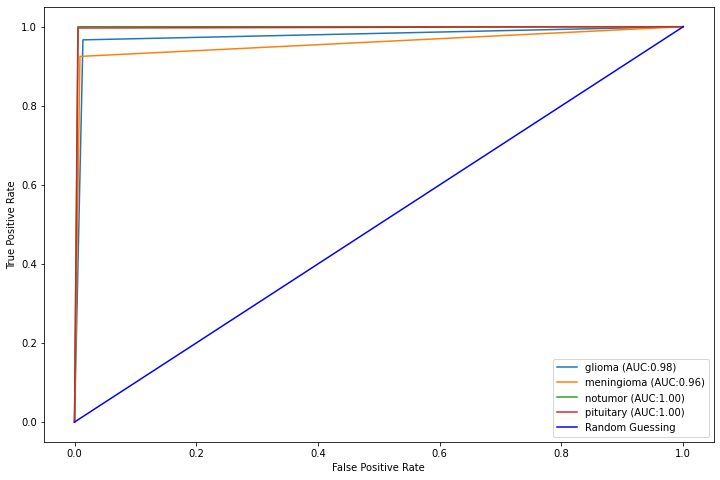

In [26]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('CNN ROC AUC score:', multiclass_roc_auc_score(y_test_CNN, y_pred_CNN))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

SVC ROC AUC score: 0.9286360513536567


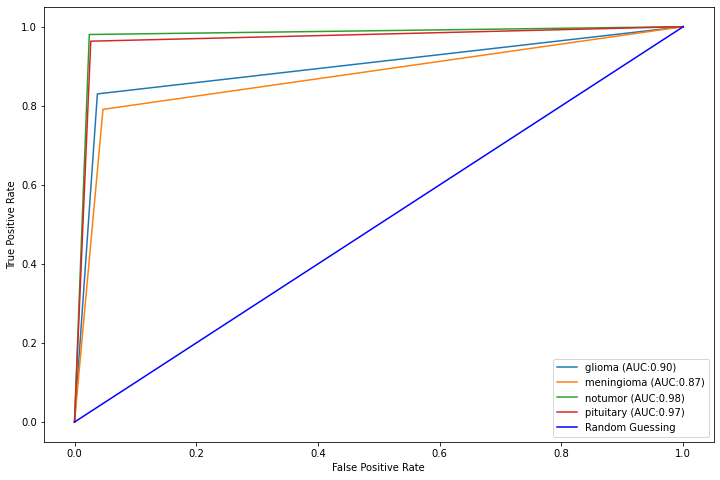

In [27]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('SVC ROC AUC score:', multiclass_roc_auc_score(y_test_SVC, y_pred_SVC))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()